#**PROJETO DE TEORIA DOS GRAFOS**
#Relatório de análise de acidentes automobilísticos na Paraíba em 2024

---
**Disciplina:** Teoria dos Grafos

**Alunos:** Isabella Tito de Oliveira Silva e Matheus da Silva Nascimento

---

##Importação das bibliotecas e da Base de dados

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/IsabellaTito/Projeto_Grafos/refs/heads/main/datatran2024_utf8.csv"

dados = pd.read_csv(url,encoding="utf-8",sep=";")

dados

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,-18.482610,-39.923790,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73151,661295.0,2024-12-21,sábado,07:00:00,PB,230,"135,2",CAMPINA GRANDE,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,-7.282103,-35.768394,SPRF-PB,DEL02-PB,UOP01-DEL02-PB
73152,661307.0,2024-12-01,domingo,06:30:00,RJ,393,298,VOLTA REDONDA,Ausência de reação do condutor,Colisão frontal,...,0,0,0,2,2,-22.543133,-44.112986,SPRF-RJ,DEL07-RJ,UOP02-DEL07-RJ
73153,661377.0,2024-07-09,terça-feira,16:20:00,ES,101,"101,5",SOORETAMA,Desrespeitar a preferência no cruzamento,Colisão transversal,...,0,0,0,3,2,-18.988339,-39.999335,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
73154,661576.0,2024-12-17,terça-feira,21:35:00,RJ,101,391,RIO DE JANEIRO,Frear bruscamente,Colisão traseira,...,0,1,0,1,2,-22.894827,-43.684920,SPRF-RJ,DEL03-RJ,UOP01-DEL03-RJ


In [3]:
dados.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000
mean,613003.770340,209.575004,2.597162,0.084204,0.877331,0.278091,1.048103,0.395661,1.155421,1.985811,-18.810858,-46.395744
std,23344.408649,128.818508,2.232573,0.372804,1.126993,0.635996,1.746499,0.822872,1.253310,1.083471,7.722916,6.214783
min,571772.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.680584,-72.641548
25%,593042.750000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.103899,-50.212551
50%,613246.500000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.411868,-47.009041
75%,633190.250000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,-12.588467,-42.184893
max,661607.000000,495.000000,93.000000,37.000000,83.000000,35.000000,78.000000,33.000000,84.000000,26.000000,4.449203,-32.406822


---
## Grafos dos acidentes das BRs na Paraíba
---

In [9]:
dados_brs = dados.groupby(["uf","br"]).br.agg([len])
dados_brs.reset_index(inplace=True)

dados_pb_brs = dados_brs.loc[dados_brs.uf == "PB"]
#dados_pb_brs

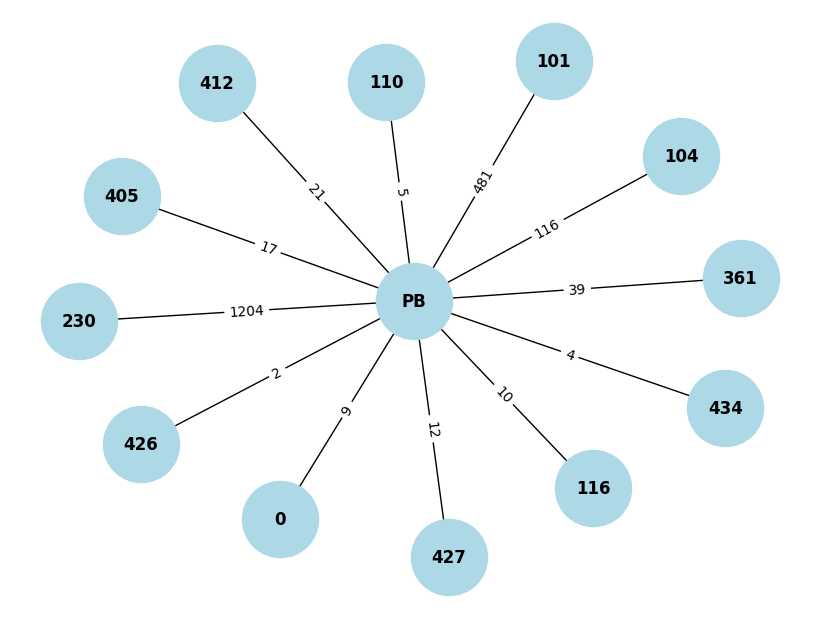

In [12]:
# Criando o grafo
G = nx.from_pandas_edgelist(dados_pb_brs, "br", "uf", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G)

# Plotando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G, 'len')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#plt.title('Grafo dos acidentes nas BRs da Paraíba')

#Para exportação da imagem
#plt.savefig('acidentes-brs-pb.png')

plt.show()

---
## Grafos das causas de acidentes na BR-230 e na BR-101
---

In [13]:
dados_uf_br_causa = dados.groupby(["uf","br", "causa_acidente"]).causa_acidente.agg([len])
dados_uf_br_causa.reset_index(inplace=True)

dados_uf_br_causa_pb_230 = dados_uf_br_causa.loc[(dados_uf_br_causa.uf == "PB") & (dados_uf_br_causa.br == 230)]
#dados_uf_br_causa_pb_230

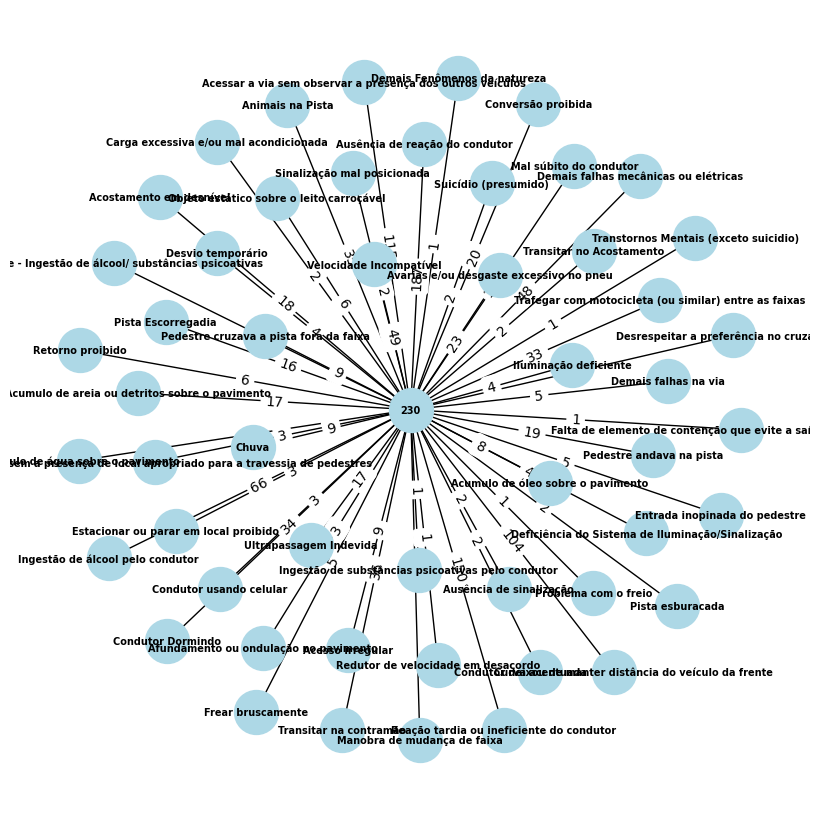

In [14]:
G21 = nx.from_pandas_edgelist(dados_uf_br_causa_pb_230, "causa_acidente", "br", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G21)

# Plotando o grafo
plt.figure(figsize=(8, 8))
nx.draw(G21, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G21, 'len')
nx.draw_networkx_edge_labels(G21, pos, edge_labels=edge_labels)

#plt.title('Causas de acidentes na Paraíba na BR 230')
#plt.savefig('acidentes-brs-230-pb.png')
plt.show()

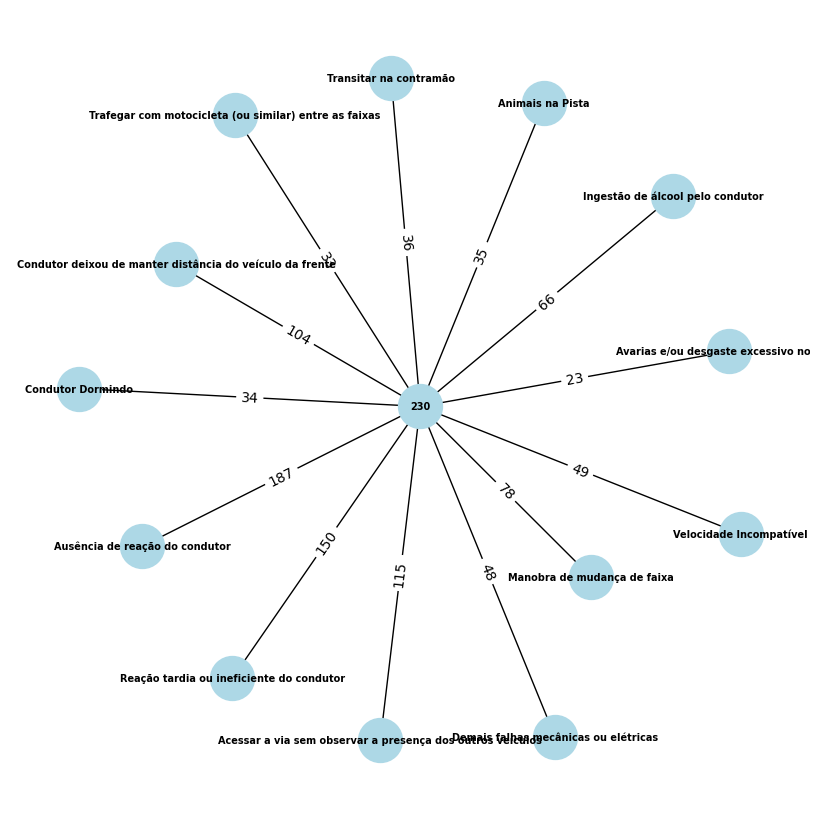

In [15]:
#Apenas os que tiveram mais de 20 ocorrências para ficar melhor de vizualizar
dados_uf_br_causa_pb_230 = dados_uf_br_causa.loc[(dados_uf_br_causa.uf == "PB") & (dados_uf_br_causa.br == 230) & (dados_uf_br_causa.len > 20)]

G2 = nx.from_pandas_edgelist(dados_uf_br_causa_pb_230, "causa_acidente", "br", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G2)

# Plotando o grafo
plt.figure(figsize=(8, 8))
nx.draw(G2, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G2, 'len')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)

#plt.title('Causas de acidentes na Paraíba na BR 230 com mais de 20 ocorências')
plt.savefig('acidentes-brs-230-pb(20).png')
plt.show()

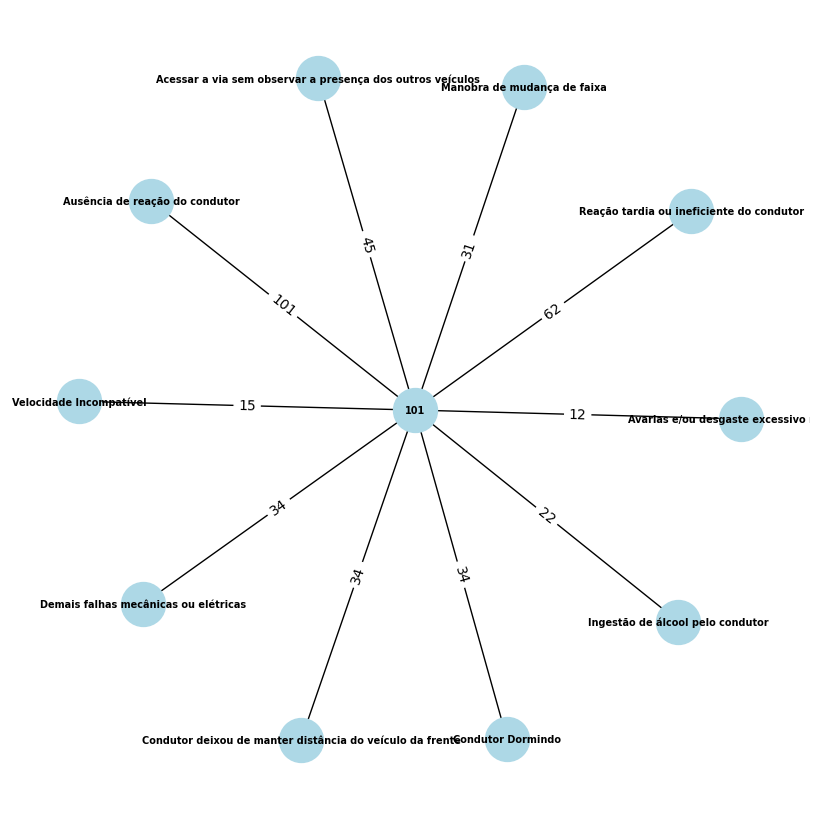

In [16]:
dados_uf_br_causa_pb_101 = dados_uf_br_causa.loc[(dados_uf_br_causa.uf == "PB") & (dados_uf_br_causa.br == 101) & (dados_uf_br_causa.len > 10)]

G3 = nx.from_pandas_edgelist(dados_uf_br_causa_pb_101, "causa_acidente", "br", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G3)

# Plotando o grafo
plt.figure(figsize=(8, 8))
nx.draw(G3, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G3, 'len')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=edge_labels)

#plt.title('Causas de acidentes na Paraíba na BR 101 com mais de 10 ocorências')
#plt.savefig('acidentes-brs-101-pb(10).png')
plt.show()

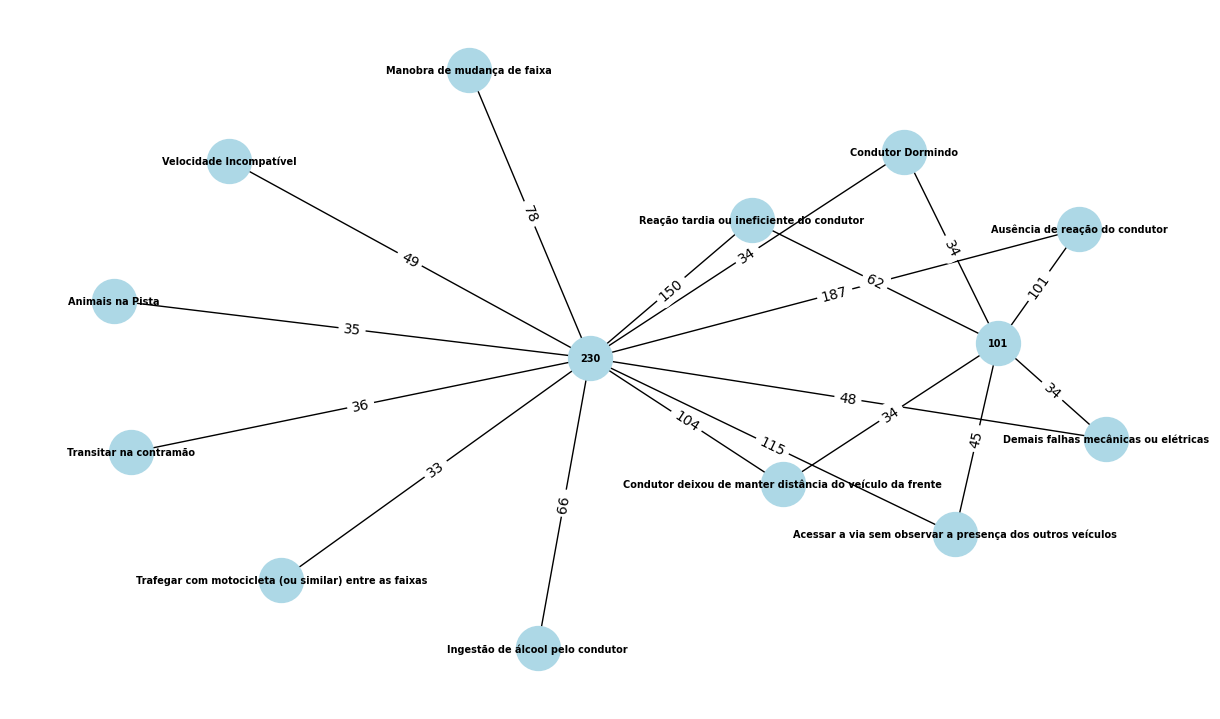

In [19]:
dados_uf_br_causa_pb_top = dados_uf_br_causa.loc[(dados_uf_br_causa.uf == "PB")].sort_values(by="len", ascending=False).head(18)

G23 = nx.from_pandas_edgelist(dados_uf_br_causa_pb_top, "causa_acidente", "br", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G23)

# Plotando o grafo
plt.figure(figsize=(12, 7))
nx.draw(G23, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G23, 'len')
nx.draw_networkx_edge_labels(G23, pos, edge_labels=edge_labels)

#plt.savefig('acidentes-brs-causas-pb.png')

#plt.title('Causas de acidentes na Paraíba na BR 101 com mais de 10 ocorências')
plt.show()

---
## Grafos envolvendo os municípios da Paraíba
---

In [20]:
dados_municipios = dados.groupby(["uf","municipio"]).municipio.agg([len])
dados_municipios.reset_index(inplace=True)
#dados_municipios

dados_municipios_pb = dados_municipios.loc[(dados_municipios.uf == "PB") & (dados_municipios.len > 30)]

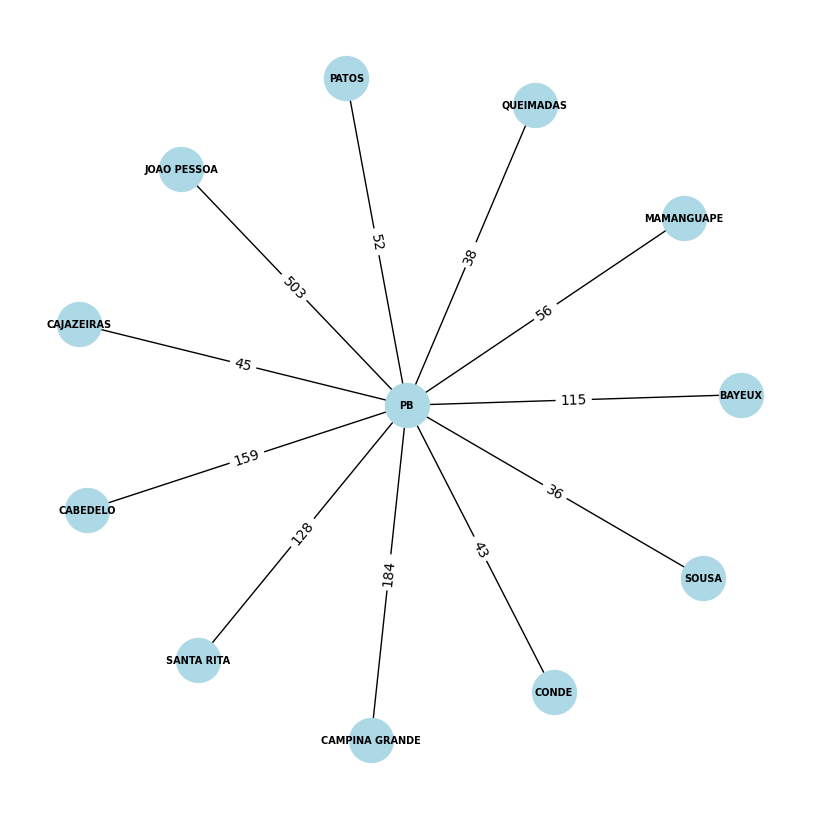

In [21]:
G4 = nx.from_pandas_edgelist(dados_municipios_pb, "municipio", "uf", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G4)

# Plotando o grafo
plt.figure(figsize=(8, 8))
nx.draw(G4, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G4, 'len')
nx.draw_networkx_edge_labels(G4, pos, edge_labels=edge_labels)

#plt.title('Municipios da Paraíba e a ocorrência de acidentes')
#plt.savefig('municipio-pb.png')
plt.show()

In [22]:
dados_causas_municipios = dados.groupby(["uf","causa_acidente","municipio"]).municipio.agg([len])
dados_causas_municipios.reset_index(inplace=True)
dados_causas_municipios_pb = dados_causas_municipios.loc[dados_causas_municipios.uf == "PB"].sort_values(by="len", ascending=False).head(20)

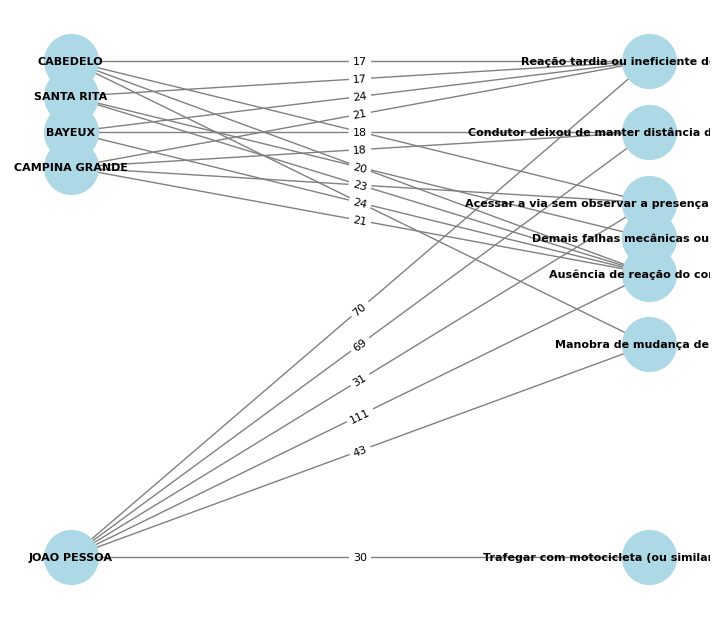

In [23]:
# Cria um grafo bipartido
G_bipartido_1 = nx.Graph()

# Define os dois conjuntos de nós (partes A e B)
conjunto_A = dados_causas_municipios_pb.municipio.tolist()
conjunto_B = dados_causas_municipios_pb.causa_acidente.tolist()

# Adiciona nós ao grafo
G_bipartido_1.add_nodes_from(conjunto_A, bipartite=0)
G_bipartido_1.add_nodes_from(conjunto_B, bipartite=1)

# Define as arestas entre os nós de A e B
#arestas = [('A1', 'B1'), ('A1', 'B2'), ('A2', 'B2'), ('A3', 'B3')]
arestas = []
for _, row in dados_causas_municipios_pb.iterrows():
  arestas.append((row["municipio"],row["causa_acidente"],row["len"]))

# Adiciona as arestas ao grafo
G_bipartido_1.add_weighted_edges_from(arestas)

# Define as posições dos nós manualmente
pos = {}

# Posiciona os nós do conjunto_A na vertical do lado esquerdo
for i, node in enumerate(conjunto_A):
    pos[node] = (0, i)  # Posição na coluna 0, com diferentes valores de linha (eixo Y)

# Posiciona os nós do conjunto_B na vertical do lado direito
for i, node in enumerate(conjunto_B):
    pos[node] = (1, i)  # Posição na coluna 2, com diferentes valores de linha (eixo Y)

#for i, node in enumerate(conjunto_A):
#    pos[node] = (i + 2, pos[node][1])

plt.figure(figsize=(7, 6))  # Ajusta o tamanho da figura
nx.draw(G_bipartido_1, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=8, font_weight='bold', edge_color='gray')

# Adiciona os pesos nas arestas como rótulos
edge_labels = nx.get_edge_attributes(G_bipartido_1, 'weight')
nx.draw_networkx_edge_labels(G_bipartido_1, pos, edge_labels=edge_labels, font_size=8)
#plt.savefig('municipio-causa2-pb.png')
# Exibe o gráfico
plt.show()

---
## Grafos envolvendo horarios e dias da semana
---

In [24]:
dados_uf_dia = dados.groupby(["uf","dia_semana"]).dia_semana.agg([len])
dados_uf_dia.reset_index(inplace=True)
dados_uf_dia_pb = dados_uf_dia.loc[dados_uf_dia.uf == "PB"]

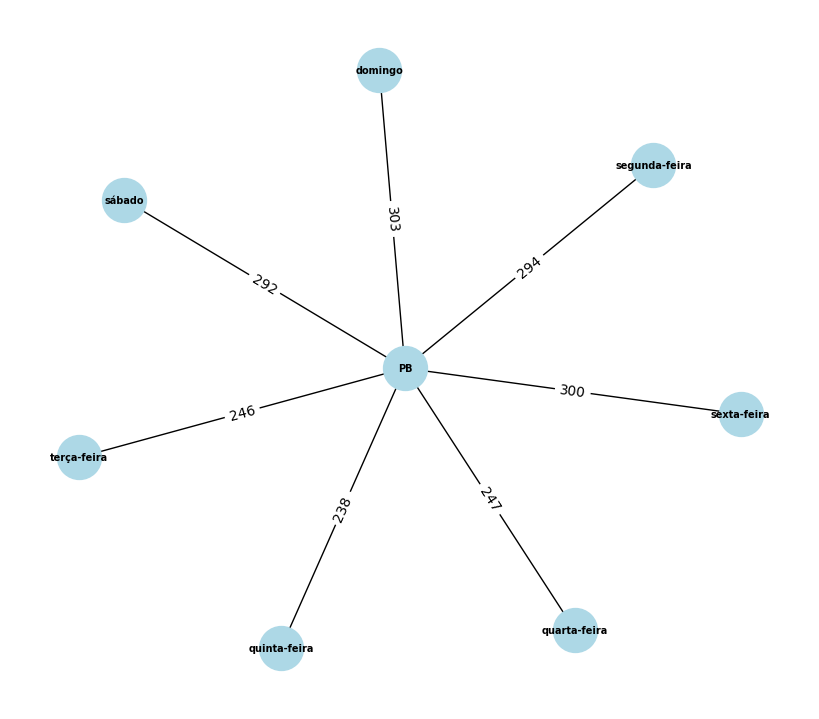

In [26]:
G5 = nx.from_pandas_edgelist(dados_uf_dia_pb, "dia_semana", "uf", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G5)

# Plotando o grafo
plt.figure(figsize=(8, 7))
nx.draw(G5, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G5, 'len')
nx.draw_networkx_edge_labels(G5, pos, edge_labels=edge_labels)

#plt.title('Dias da semana e as ocorrências de acidentes na Paraíba')
#plt.savefig('dia-semana-pb.png')
plt.show()

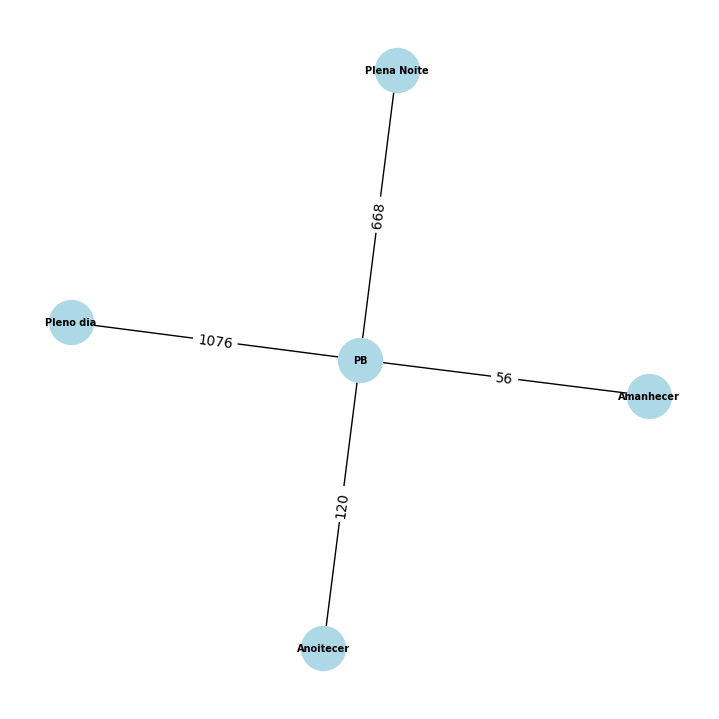

In [27]:
dados_uf_fase_dia = dados.groupby(["uf", "fase_dia"]).fase_dia.agg([len]).reset_index()
dados_uf_fase_dia_pb = dados_uf_fase_dia.loc[dados_uf_fase_dia.uf == "PB"]

G6 = nx.from_pandas_edgelist(dados_uf_fase_dia_pb, "fase_dia", "uf", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G6)

# Plotando o grafo
plt.figure(figsize=(7, 7))
nx.draw(G6, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G6, 'len')
nx.draw_networkx_edge_labels(G6, pos, edge_labels=edge_labels)

#plt.title('Fase do dia e as ocorrências de acidentes na Paraíba')
#plt.savefig('fase-dia-pb.png')
plt.show()

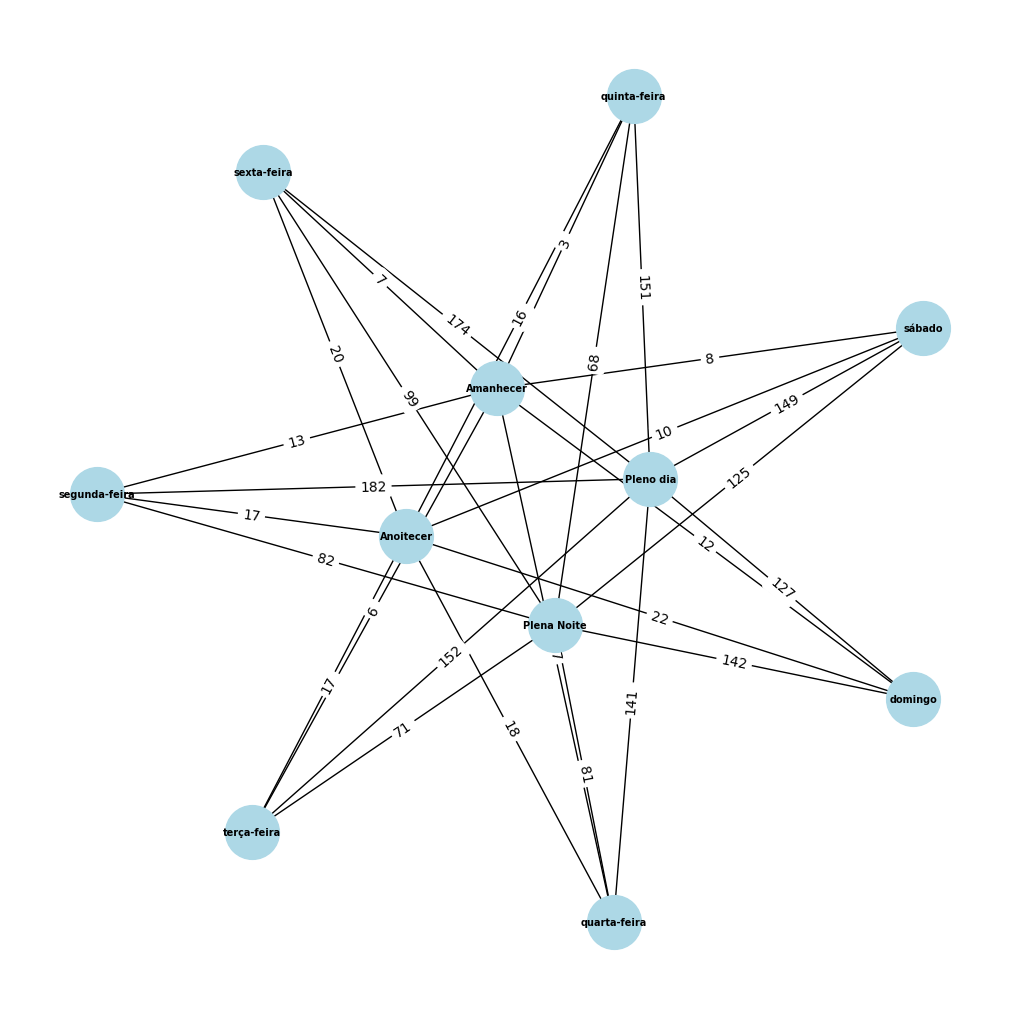

In [28]:
dados_uf_dia_fase = dados.groupby(["uf", "dia_semana", "fase_dia"]).fase_dia.agg([len]).reset_index()
dados_uf_dia_fase_pb = dados_uf_dia_fase.loc[dados_uf_dia_fase.uf == "PB"]

G7 = nx.from_pandas_edgelist(dados_uf_dia_fase_pb, "fase_dia", "dia_semana", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G7)

# Plotando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G7, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G7, 'len')
nx.draw_networkx_edge_labels(G7, pos, edge_labels=edge_labels)

#plt.title('Fase do dia e dias da semana das ocorrências de acidentes na Paraíba')
#plt.savefig('fase-semana-pb.png')
plt.show()

---
##Grafos relacionando os kms da BR-230 e BR-101 com as ocorrências de acidentes
---

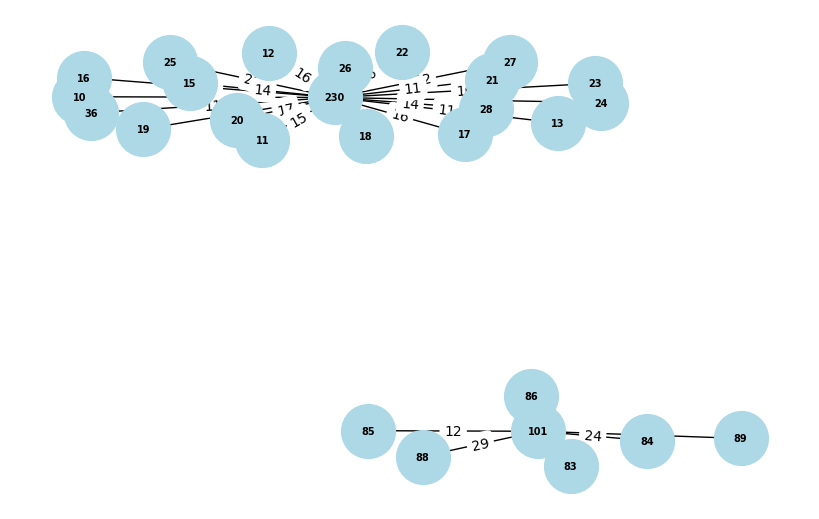

In [37]:
dados_uf_br_km = dados.groupby(["uf","br","km"]).km.agg([len]).reset_index()
dados_uf_br_km_top = dados_uf_br_km.loc[(dados_uf_br_km.uf == "PB")].sort_values(by="len", ascending=False).head(25)

G9 = nx.from_pandas_edgelist(dados_uf_br_km_top, "br", "km", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G9)

# Plotando o grafo
plt.figure(figsize=(8, 5))
nx.draw(G9, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G9, 'len')
nx.draw_networkx_edge_labels(G9, pos, edge_labels=edge_labels)

#plt.title('Top 25 das ocorrencias por km das br da Paraíba')
#plt.savefig('top-25-ocorrencias-km.png')
plt.show()

---
## Análises das classificações dos acidentes por municípios
---

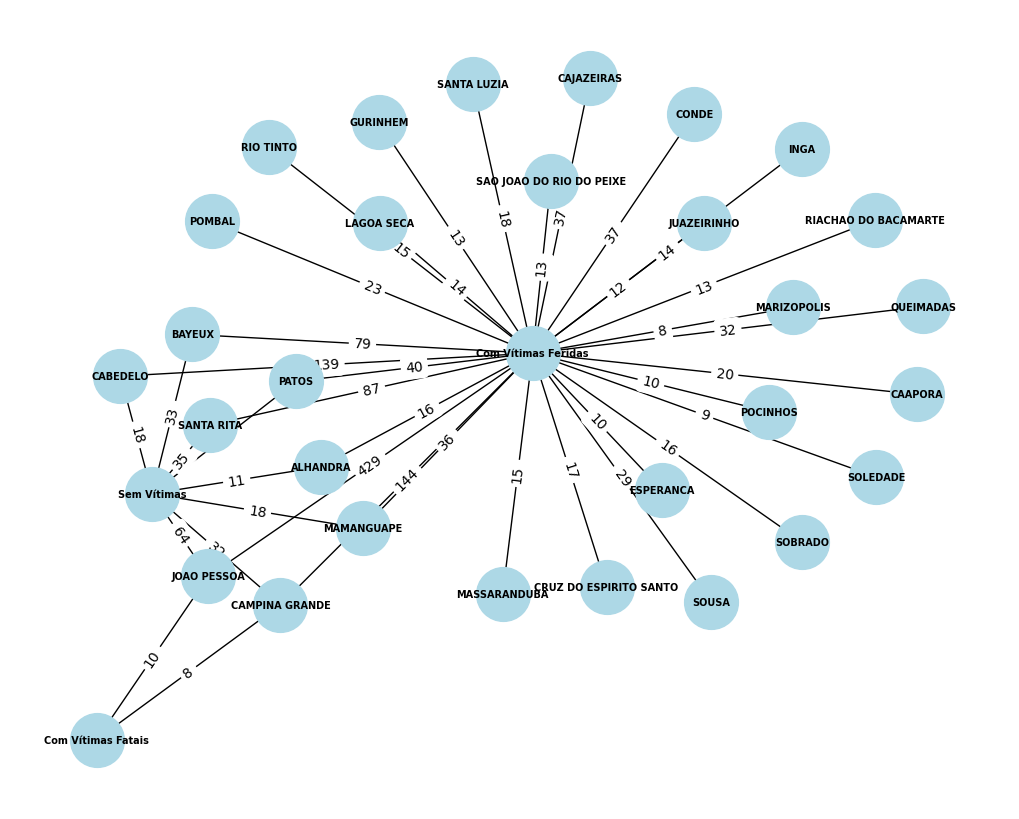

In [39]:
dados_uf_classificacao = dados.groupby(["uf","municipio","classificacao_acidente"]).classificacao_acidente.agg([len]).reset_index()
dados_uf_classificacao_pb = dados_uf_classificacao.loc[(dados_uf_classificacao.uf == "PB")].sort_values(by="len", ascending=False).head(39)

G8 = nx.from_pandas_edgelist(dados_uf_classificacao_pb, "municipio", "classificacao_acidente", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G8)

# Plotando o grafo
plt.figure(figsize=(10, 8))
nx.draw(G8, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G8, 'len')
nx.draw_networkx_edge_labels(G8, pos, edge_labels=edge_labels)

#plt.title('Top 15 das ocorrências de acidentes na Paraíba com e sem vítimas')
#plt.savefig('39-acidente-vitimas.png')
plt.show()

In [40]:
dados_pb = dados.loc[dados.uf == "PB"]
dados_fatais_pb = dados_pb.groupby(["classificacao_acidente","causa_acidente"]).causa_acidente.agg([len]).reset_index()
dados_fatais_causa_pb = dados_fatais_pb.loc[dados_fatais_pb.classificacao_acidente == "Com Vítimas Fatais"].sort_values(by="len", ascending=False).head(15)

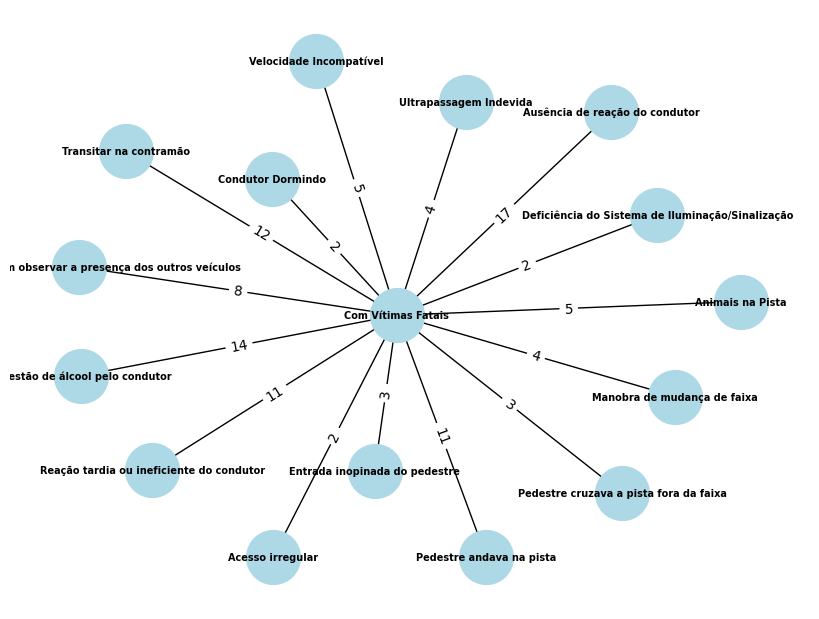

In [41]:
G12 = nx.from_pandas_edgelist(dados_fatais_causa_pb, "classificacao_acidente", "causa_acidente", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G12)

# Plotando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G12, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G12, 'len')
nx.draw_networkx_edge_labels(G12, pos, edge_labels=edge_labels)

#plt.title('Top 15 das ocorrências de acidentes na Paraíba com e sem vítimas')
#plt.savefig('acidentes-fatais-causas.png')
plt.show()

---
##Investigação das ocorrências de acidentes ao longo dos meses
---

In [43]:
dados_pb = dados.loc[dados.uf == "PB"]

#Acrescentando uma coluna para o mês
dados_pb["mes"] = dados_pb.data_inversa.map(lambda data: data[5:7])
dados_mes_pb = dados_pb.groupby(["uf","mes"]).mes.agg([len]).reset_index()

<ipython-input-43-f21a8697543d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pb["mes"] = dados_pb.data_inversa.map(lambda data: data[5:7])


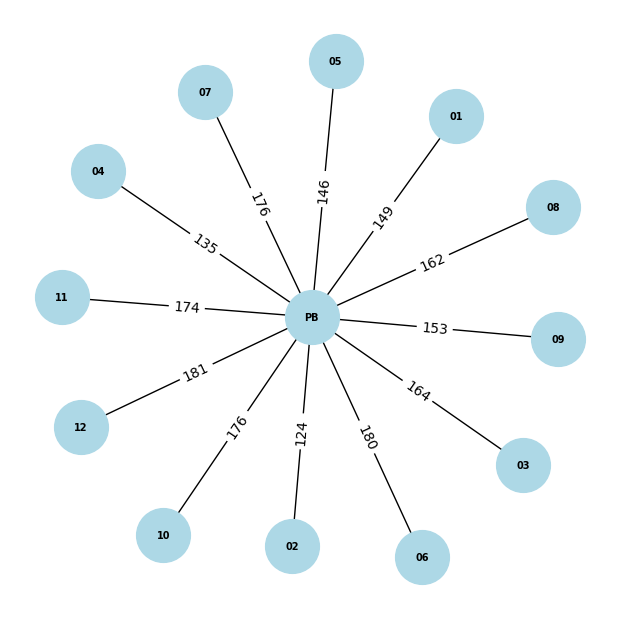

In [44]:
G9 = nx.from_pandas_edgelist(dados_mes_pb, "uf", "mes", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G9)

# Plotando o grafo
plt.figure(figsize=(6, 6))
nx.draw(G9, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G9, 'len')
nx.draw_networkx_edge_labels(G9, pos, edge_labels=edge_labels)

#plt.title('Top 15 das ocorrências de acidentes na Paraíba com e sem vítimas')
#plt.savefig('mes-acidente.png')
plt.show()

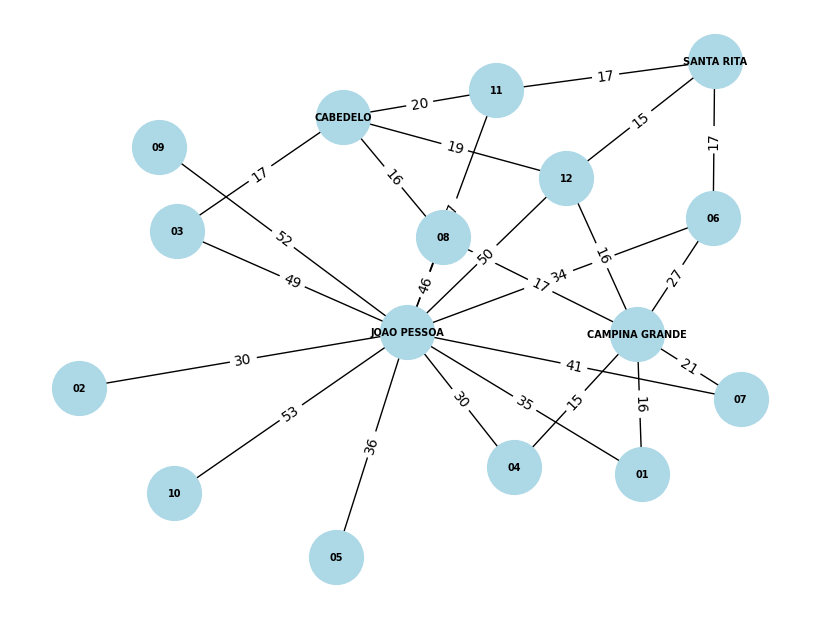

In [45]:
dados_mes_municipio_pb = dados_pb.groupby(["municipio","mes"]).mes.agg([len]).reset_index().sort_values(by="len", ascending=False).head(25)

G10 = nx.from_pandas_edgelist(dados_mes_municipio_pb, "municipio", "mes", ["len"])

# Posicionamento dos nós (usando um layout de rede)
pos = nx.spring_layout(G10)

# Plotando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G10, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=7, font_weight='bold')

# Desenhando as arestas e colocando os pesos
edge_labels = nx.get_edge_attributes(G10, 'len')
nx.draw_networkx_edge_labels(G10, pos, edge_labels=edge_labels)

#plt.title('Top 15 das ocorrências de acidentes na Paraíba com e sem vítimas')
#plt.savefig('me-municipio-acidente-vitimas.png')
plt.show()